# Preparation

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("paper")   

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import warnings
warnings.simplefilter('ignore')


import statistics
import math
from random import random
from IPython.display import display
from sklearn.preprocessing import LabelEncoder

# Data loading

In [13]:
d_train_x = pd.read_csv('dev_rsc/d_train_x.csv',index_col=0)
d_train_y = pd.read_csv('dev_rsc/d_train_y.csv',index_col=0)
d_test_x = pd.read_csv('dev_rsc/d_test_x.csv',index_col=0)

print(d_train_x.shape)
print(d_train_y.shape)
print(d_test_x.shape)


(1452, 350)
(1452, 1)
(1459, 350)


# GBM

In [15]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

In [16]:
# データの分割
train_x, valid_x, train_y, valid_y = train_test_split(
        d_train_x,
        d_train_y,
        test_size=0.3,
        random_state=0)

In [17]:
#特徴量と目的変数をxgboostのデータ構造に変換する
dtrain = xgb.DMatrix(train_x, label=train_y)
dvalid = xgb.DMatrix(valid_x,label=valid_y)

#パラメータを指定してGBDT
num_round = 5000
evallist = [(dvalid, 'eval'), (dtrain, 'train')]

evals_result = {}

#パラメータ
param = {
            'max_depth': 3,
            'eta': 0.01,
            'objective': 'reg:squarederror',
}

#学習の実行
bst = xgb.train(
                        param, dtrain,
                        num_round,
                        evallist,
                        evals_result=evals_result,
                        # 一定ラウンド回しても改善が見込めない場合は学習を打ち切る
                        early_stopping_rounds=1000)

[0]	eval-rmse:11.4075	train-rmse:11.4152
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 1000 rounds.
[1]	eval-rmse:11.2936	train-rmse:11.3013
[2]	eval-rmse:11.1809	train-rmse:11.1886
[3]	eval-rmse:11.0692	train-rmse:11.0769
[4]	eval-rmse:10.9587	train-rmse:10.9664
[5]	eval-rmse:10.8493	train-rmse:10.857
[6]	eval-rmse:10.741	train-rmse:10.7487
[7]	eval-rmse:10.6338	train-rmse:10.6414
[8]	eval-rmse:10.5276	train-rmse:10.5353
[9]	eval-rmse:10.4225	train-rmse:10.4302
[10]	eval-rmse:10.3184	train-rmse:10.3261
[11]	eval-rmse:10.2154	train-rmse:10.2231
[12]	eval-rmse:10.1135	train-rmse:10.1211
[13]	eval-rmse:10.0125	train-rmse:10.0202
[14]	eval-rmse:9.91256	train-rmse:9.92022
[15]	eval-rmse:9.81362	train-rmse:9.82127
[16]	eval-rmse:9.71566	train-rmse:9.72331
[17]	eval-rmse:9.61869	train-rmse:9.62633
[18]	eval-rmse:9.52268	train-rmse:9.53032
[19]	eval-rmse:9.42764	train-rmse:9.43527
[20]	eval-rmse:9.33354	tr

[191]	eval-rmse:1.69583	train-rmse:1.69505
[192]	eval-rmse:1.67915	train-rmse:1.67834
[193]	eval-rmse:1.66263	train-rmse:1.6618
[194]	eval-rmse:1.64624	train-rmse:1.64542
[195]	eval-rmse:1.63012	train-rmse:1.62921
[196]	eval-rmse:1.61413	train-rmse:1.61316
[197]	eval-rmse:1.59826	train-rmse:1.59727
[198]	eval-rmse:1.58252	train-rmse:1.58154
[199]	eval-rmse:1.56698	train-rmse:1.56597
[200]	eval-rmse:1.55162	train-rmse:1.55055
[201]	eval-rmse:1.53636	train-rmse:1.53529
[202]	eval-rmse:1.52123	train-rmse:1.52018
[203]	eval-rmse:1.50625	train-rmse:1.50522
[204]	eval-rmse:1.49142	train-rmse:1.49042
[205]	eval-rmse:1.47683	train-rmse:1.47575
[206]	eval-rmse:1.4623	train-rmse:1.46124
[207]	eval-rmse:1.44792	train-rmse:1.44687
[208]	eval-rmse:1.4338	train-rmse:1.43265
[209]	eval-rmse:1.41982	train-rmse:1.41857
[210]	eval-rmse:1.40595	train-rmse:1.40463
[211]	eval-rmse:1.39215	train-rmse:1.39083
[212]	eval-rmse:1.37856	train-rmse:1.37716
[213]	eval-rmse:1.365	train-rmse:1.36364
[214]	eval-rmse:

[377]	eval-rmse:0.298988	train-rmse:0.290596
[378]	eval-rmse:0.296578	train-rmse:0.288147
[379]	eval-rmse:0.294188	train-rmse:0.285726
[380]	eval-rmse:0.291838	train-rmse:0.283332
[381]	eval-rmse:0.28958	train-rmse:0.280971
[382]	eval-rmse:0.287319	train-rmse:0.278629
[383]	eval-rmse:0.285064	train-rmse:0.276315
[384]	eval-rmse:0.282847	train-rmse:0.274028
[385]	eval-rmse:0.280598	train-rmse:0.271771
[386]	eval-rmse:0.278397	train-rmse:0.269531
[387]	eval-rmse:0.276252	train-rmse:0.267317
[388]	eval-rmse:0.274111	train-rmse:0.265127
[389]	eval-rmse:0.272041	train-rmse:0.26297
[390]	eval-rmse:0.269965	train-rmse:0.260829
[391]	eval-rmse:0.267906	train-rmse:0.258713
[392]	eval-rmse:0.265908	train-rmse:0.256622
[393]	eval-rmse:0.263961	train-rmse:0.254554
[394]	eval-rmse:0.262006	train-rmse:0.252507
[395]	eval-rmse:0.260064	train-rmse:0.250489
[396]	eval-rmse:0.258169	train-rmse:0.248486
[397]	eval-rmse:0.256291	train-rmse:0.246517
[398]	eval-rmse:0.254403	train-rmse:0.244562
[399]	eval-r

[560]	eval-rmse:0.13213	train-rmse:0.108975
[561]	eval-rmse:0.131932	train-rmse:0.108727
[562]	eval-rmse:0.131746	train-rmse:0.108507
[563]	eval-rmse:0.131586	train-rmse:0.108283
[564]	eval-rmse:0.131419	train-rmse:0.108045
[565]	eval-rmse:0.131244	train-rmse:0.107812
[566]	eval-rmse:0.131081	train-rmse:0.107578
[567]	eval-rmse:0.130922	train-rmse:0.10735
[568]	eval-rmse:0.130764	train-rmse:0.107144
[569]	eval-rmse:0.130596	train-rmse:0.10692
[570]	eval-rmse:0.130442	train-rmse:0.106716
[571]	eval-rmse:0.130291	train-rmse:0.106507
[572]	eval-rmse:0.130159	train-rmse:0.106303
[573]	eval-rmse:0.129979	train-rmse:0.106101
[574]	eval-rmse:0.129845	train-rmse:0.105908
[575]	eval-rmse:0.129703	train-rmse:0.105721
[576]	eval-rmse:0.12956	train-rmse:0.105526
[577]	eval-rmse:0.129438	train-rmse:0.105335
[578]	eval-rmse:0.129303	train-rmse:0.105142
[579]	eval-rmse:0.12915	train-rmse:0.104942
[580]	eval-rmse:0.12903	train-rmse:0.104762
[581]	eval-rmse:0.128908	train-rmse:0.104585
[582]	eval-rmse:

[743]	eval-rmse:0.119441	train-rmse:0.089741
[744]	eval-rmse:0.119429	train-rmse:0.089696
[745]	eval-rmse:0.119402	train-rmse:0.089643
[746]	eval-rmse:0.119376	train-rmse:0.089597
[747]	eval-rmse:0.119357	train-rmse:0.089548
[748]	eval-rmse:0.119357	train-rmse:0.089505
[749]	eval-rmse:0.11932	train-rmse:0.089458
[750]	eval-rmse:0.119292	train-rmse:0.089411
[751]	eval-rmse:0.119268	train-rmse:0.089354
[752]	eval-rmse:0.119244	train-rmse:0.0893
[753]	eval-rmse:0.119218	train-rmse:0.089259
[754]	eval-rmse:0.11919	train-rmse:0.089204
[755]	eval-rmse:0.119172	train-rmse:0.089158
[756]	eval-rmse:0.119137	train-rmse:0.089112
[757]	eval-rmse:0.119123	train-rmse:0.089065
[758]	eval-rmse:0.119099	train-rmse:0.089022
[759]	eval-rmse:0.119091	train-rmse:0.088959
[760]	eval-rmse:0.119074	train-rmse:0.088911
[761]	eval-rmse:0.119046	train-rmse:0.088871
[762]	eval-rmse:0.119033	train-rmse:0.088817
[763]	eval-rmse:0.119035	train-rmse:0.088773
[764]	eval-rmse:0.119026	train-rmse:0.088734
[765]	eval-rms

[926]	eval-rmse:0.116531	train-rmse:0.082836
[927]	eval-rmse:0.116524	train-rmse:0.082812
[928]	eval-rmse:0.116512	train-rmse:0.082778
[929]	eval-rmse:0.116509	train-rmse:0.082753
[930]	eval-rmse:0.116505	train-rmse:0.082723
[931]	eval-rmse:0.116499	train-rmse:0.082703
[932]	eval-rmse:0.11648	train-rmse:0.082671
[933]	eval-rmse:0.116456	train-rmse:0.082608
[934]	eval-rmse:0.116438	train-rmse:0.082582
[935]	eval-rmse:0.116442	train-rmse:0.082554
[936]	eval-rmse:0.116424	train-rmse:0.082533
[937]	eval-rmse:0.11641	train-rmse:0.0825
[938]	eval-rmse:0.116402	train-rmse:0.082467
[939]	eval-rmse:0.116378	train-rmse:0.082446
[940]	eval-rmse:0.116364	train-rmse:0.082411
[941]	eval-rmse:0.11634	train-rmse:0.08235
[942]	eval-rmse:0.116334	train-rmse:0.082326
[943]	eval-rmse:0.116325	train-rmse:0.082294
[944]	eval-rmse:0.116315	train-rmse:0.082274
[945]	eval-rmse:0.116305	train-rmse:0.082243
[946]	eval-rmse:0.116295	train-rmse:0.082215
[947]	eval-rmse:0.116282	train-rmse:0.082177
[948]	eval-rmse:

[1107]	eval-rmse:0.114874	train-rmse:0.078049
[1108]	eval-rmse:0.114864	train-rmse:0.078031
[1109]	eval-rmse:0.114851	train-rmse:0.078006
[1110]	eval-rmse:0.114837	train-rmse:0.07798
[1111]	eval-rmse:0.114824	train-rmse:0.077957
[1112]	eval-rmse:0.114814	train-rmse:0.077928
[1113]	eval-rmse:0.11481	train-rmse:0.077907
[1114]	eval-rmse:0.114807	train-rmse:0.077889
[1115]	eval-rmse:0.114793	train-rmse:0.077873
[1116]	eval-rmse:0.114792	train-rmse:0.077858
[1117]	eval-rmse:0.114779	train-rmse:0.077832
[1118]	eval-rmse:0.114786	train-rmse:0.077811
[1119]	eval-rmse:0.114785	train-rmse:0.077777
[1120]	eval-rmse:0.114772	train-rmse:0.077759
[1121]	eval-rmse:0.114763	train-rmse:0.077738
[1122]	eval-rmse:0.114766	train-rmse:0.077716
[1123]	eval-rmse:0.114755	train-rmse:0.07769
[1124]	eval-rmse:0.11476	train-rmse:0.07767
[1125]	eval-rmse:0.114753	train-rmse:0.077646
[1126]	eval-rmse:0.114738	train-rmse:0.077631
[1127]	eval-rmse:0.114743	train-rmse:0.077613
[1128]	eval-rmse:0.114746	train-rmse:0.

[1286]	eval-rmse:0.114119	train-rmse:0.074535
[1287]	eval-rmse:0.11411	train-rmse:0.074522
[1288]	eval-rmse:0.114108	train-rmse:0.074511
[1289]	eval-rmse:0.114091	train-rmse:0.074489
[1290]	eval-rmse:0.114089	train-rmse:0.074473
[1291]	eval-rmse:0.11408	train-rmse:0.074442
[1292]	eval-rmse:0.114075	train-rmse:0.07443
[1293]	eval-rmse:0.114075	train-rmse:0.074416
[1294]	eval-rmse:0.114067	train-rmse:0.074397
[1295]	eval-rmse:0.114058	train-rmse:0.074385
[1296]	eval-rmse:0.11406	train-rmse:0.074367
[1297]	eval-rmse:0.114069	train-rmse:0.074352
[1298]	eval-rmse:0.114061	train-rmse:0.074334
[1299]	eval-rmse:0.114059	train-rmse:0.074316
[1300]	eval-rmse:0.114059	train-rmse:0.074303
[1301]	eval-rmse:0.114054	train-rmse:0.074278
[1302]	eval-rmse:0.114038	train-rmse:0.074263
[1303]	eval-rmse:0.114033	train-rmse:0.074251
[1304]	eval-rmse:0.114023	train-rmse:0.074221
[1305]	eval-rmse:0.114016	train-rmse:0.074202
[1306]	eval-rmse:0.114014	train-rmse:0.074186
[1307]	eval-rmse:0.114018	train-rmse:0

[1466]	eval-rmse:0.11379	train-rmse:0.071612
[1467]	eval-rmse:0.113792	train-rmse:0.071602
[1468]	eval-rmse:0.113789	train-rmse:0.07159
[1469]	eval-rmse:0.113786	train-rmse:0.071575
[1470]	eval-rmse:0.113784	train-rmse:0.071565
[1471]	eval-rmse:0.113783	train-rmse:0.071551
[1472]	eval-rmse:0.113782	train-rmse:0.071538
[1473]	eval-rmse:0.113789	train-rmse:0.071525
[1474]	eval-rmse:0.113796	train-rmse:0.071511
[1475]	eval-rmse:0.113794	train-rmse:0.071493
[1476]	eval-rmse:0.113794	train-rmse:0.071463
[1477]	eval-rmse:0.113796	train-rmse:0.071451
[1478]	eval-rmse:0.113794	train-rmse:0.071438
[1479]	eval-rmse:0.113793	train-rmse:0.071429
[1480]	eval-rmse:0.113773	train-rmse:0.071407
[1481]	eval-rmse:0.113775	train-rmse:0.071393
[1482]	eval-rmse:0.113776	train-rmse:0.07138
[1483]	eval-rmse:0.11379	train-rmse:0.071366
[1484]	eval-rmse:0.11379	train-rmse:0.071341
[1485]	eval-rmse:0.113787	train-rmse:0.071327
[1486]	eval-rmse:0.113777	train-rmse:0.071308
[1487]	eval-rmse:0.113776	train-rmse:0.

[1645]	eval-rmse:0.11346	train-rmse:0.069168
[1646]	eval-rmse:0.113452	train-rmse:0.069156
[1647]	eval-rmse:0.113451	train-rmse:0.069144
[1648]	eval-rmse:0.113444	train-rmse:0.069134
[1649]	eval-rmse:0.113447	train-rmse:0.069124
[1650]	eval-rmse:0.113449	train-rmse:0.069117
[1651]	eval-rmse:0.113449	train-rmse:0.069105
[1652]	eval-rmse:0.113452	train-rmse:0.069093
[1653]	eval-rmse:0.113455	train-rmse:0.069081
[1654]	eval-rmse:0.113452	train-rmse:0.069048
[1655]	eval-rmse:0.113447	train-rmse:0.069038
[1656]	eval-rmse:0.113437	train-rmse:0.069024
[1657]	eval-rmse:0.113436	train-rmse:0.069011
[1658]	eval-rmse:0.113432	train-rmse:0.068999
[1659]	eval-rmse:0.113434	train-rmse:0.068993
[1660]	eval-rmse:0.11344	train-rmse:0.068969
[1661]	eval-rmse:0.113447	train-rmse:0.068956
[1662]	eval-rmse:0.113447	train-rmse:0.06895
[1663]	eval-rmse:0.113444	train-rmse:0.06894
[1664]	eval-rmse:0.113443	train-rmse:0.068928
[1665]	eval-rmse:0.113443	train-rmse:0.068915
[1666]	eval-rmse:0.113432	train-rmse:0

[1825]	eval-rmse:0.113189	train-rmse:0.067068
[1826]	eval-rmse:0.113187	train-rmse:0.067057
[1827]	eval-rmse:0.113183	train-rmse:0.067049
[1828]	eval-rmse:0.11318	train-rmse:0.06704
[1829]	eval-rmse:0.113183	train-rmse:0.06703
[1830]	eval-rmse:0.113182	train-rmse:0.067019
[1831]	eval-rmse:0.113186	train-rmse:0.067005
[1832]	eval-rmse:0.113183	train-rmse:0.066993
[1833]	eval-rmse:0.113184	train-rmse:0.066983
[1834]	eval-rmse:0.113185	train-rmse:0.066978
[1835]	eval-rmse:0.113187	train-rmse:0.066967
[1836]	eval-rmse:0.113182	train-rmse:0.066956
[1837]	eval-rmse:0.113184	train-rmse:0.066947
[1838]	eval-rmse:0.113176	train-rmse:0.066938
[1839]	eval-rmse:0.113179	train-rmse:0.066927
[1840]	eval-rmse:0.11317	train-rmse:0.066915
[1841]	eval-rmse:0.113174	train-rmse:0.066909
[1842]	eval-rmse:0.113175	train-rmse:0.0669
[1843]	eval-rmse:0.11317	train-rmse:0.066888
[1844]	eval-rmse:0.113164	train-rmse:0.066876
[1845]	eval-rmse:0.113162	train-rmse:0.066868
[1846]	eval-rmse:0.113165	train-rmse:0.06

[2005]	eval-rmse:0.112995	train-rmse:0.065101
[2006]	eval-rmse:0.112993	train-rmse:0.065094
[2007]	eval-rmse:0.11299	train-rmse:0.065083
[2008]	eval-rmse:0.112985	train-rmse:0.065069
[2009]	eval-rmse:0.112984	train-rmse:0.065052
[2010]	eval-rmse:0.112986	train-rmse:0.065044
[2011]	eval-rmse:0.112993	train-rmse:0.065034
[2012]	eval-rmse:0.112996	train-rmse:0.065023
[2013]	eval-rmse:0.112992	train-rmse:0.065009
[2014]	eval-rmse:0.112986	train-rmse:0.064999
[2015]	eval-rmse:0.112977	train-rmse:0.064975
[2016]	eval-rmse:0.112974	train-rmse:0.064965
[2017]	eval-rmse:0.112975	train-rmse:0.064956
[2018]	eval-rmse:0.112976	train-rmse:0.064951
[2019]	eval-rmse:0.112973	train-rmse:0.064941
[2020]	eval-rmse:0.112963	train-rmse:0.064918
[2021]	eval-rmse:0.112956	train-rmse:0.064908
[2022]	eval-rmse:0.112934	train-rmse:0.064899
[2023]	eval-rmse:0.112939	train-rmse:0.064882
[2024]	eval-rmse:0.112944	train-rmse:0.064867
[2025]	eval-rmse:0.112945	train-rmse:0.064859
[2026]	eval-rmse:0.112941	train-rms

[2184]	eval-rmse:0.112709	train-rmse:0.06321
[2185]	eval-rmse:0.112706	train-rmse:0.0632
[2186]	eval-rmse:0.112705	train-rmse:0.063193
[2187]	eval-rmse:0.112706	train-rmse:0.063185
[2188]	eval-rmse:0.11271	train-rmse:0.063176
[2189]	eval-rmse:0.112701	train-rmse:0.063165
[2190]	eval-rmse:0.112705	train-rmse:0.063156
[2191]	eval-rmse:0.112702	train-rmse:0.063143
[2192]	eval-rmse:0.112706	train-rmse:0.063135
[2193]	eval-rmse:0.112704	train-rmse:0.063128
[2194]	eval-rmse:0.112707	train-rmse:0.063119
[2195]	eval-rmse:0.112702	train-rmse:0.06311
[2196]	eval-rmse:0.112704	train-rmse:0.063091
[2197]	eval-rmse:0.112685	train-rmse:0.06307
[2198]	eval-rmse:0.112665	train-rmse:0.063062
[2199]	eval-rmse:0.112662	train-rmse:0.063054
[2200]	eval-rmse:0.112655	train-rmse:0.063047
[2201]	eval-rmse:0.112649	train-rmse:0.06303
[2202]	eval-rmse:0.112653	train-rmse:0.063021
[2203]	eval-rmse:0.112654	train-rmse:0.063016
[2204]	eval-rmse:0.112658	train-rmse:0.063001
[2205]	eval-rmse:0.112653	train-rmse:0.06

[2364]	eval-rmse:0.112418	train-rmse:0.061337
[2365]	eval-rmse:0.112429	train-rmse:0.061326
[2366]	eval-rmse:0.11243	train-rmse:0.061322
[2367]	eval-rmse:0.112422	train-rmse:0.061311
[2368]	eval-rmse:0.112418	train-rmse:0.061305
[2369]	eval-rmse:0.112423	train-rmse:0.061301
[2370]	eval-rmse:0.112429	train-rmse:0.061293
[2371]	eval-rmse:0.112424	train-rmse:0.061281
[2372]	eval-rmse:0.112421	train-rmse:0.061262
[2373]	eval-rmse:0.112415	train-rmse:0.061254
[2374]	eval-rmse:0.112421	train-rmse:0.061246
[2375]	eval-rmse:0.112422	train-rmse:0.061235
[2376]	eval-rmse:0.112419	train-rmse:0.061228
[2377]	eval-rmse:0.112418	train-rmse:0.061222
[2378]	eval-rmse:0.112418	train-rmse:0.061218
[2379]	eval-rmse:0.112412	train-rmse:0.061209
[2380]	eval-rmse:0.112417	train-rmse:0.061197
[2381]	eval-rmse:0.112415	train-rmse:0.06119
[2382]	eval-rmse:0.11242	train-rmse:0.061183
[2383]	eval-rmse:0.112419	train-rmse:0.061172
[2384]	eval-rmse:0.112422	train-rmse:0.061168
[2385]	eval-rmse:0.112416	train-rmse:

[2544]	eval-rmse:0.112229	train-rmse:0.059608
[2545]	eval-rmse:0.112229	train-rmse:0.059602
[2546]	eval-rmse:0.112229	train-rmse:0.059593
[2547]	eval-rmse:0.112219	train-rmse:0.059585
[2548]	eval-rmse:0.112215	train-rmse:0.059575
[2549]	eval-rmse:0.112222	train-rmse:0.05955
[2550]	eval-rmse:0.112224	train-rmse:0.059542
[2551]	eval-rmse:0.112213	train-rmse:0.059533
[2552]	eval-rmse:0.112215	train-rmse:0.05951
[2553]	eval-rmse:0.11221	train-rmse:0.059504
[2554]	eval-rmse:0.112211	train-rmse:0.059498
[2555]	eval-rmse:0.112212	train-rmse:0.05949
[2556]	eval-rmse:0.112212	train-rmse:0.059482
[2557]	eval-rmse:0.112201	train-rmse:0.059469
[2558]	eval-rmse:0.112206	train-rmse:0.059458
[2559]	eval-rmse:0.112209	train-rmse:0.059455
[2560]	eval-rmse:0.11221	train-rmse:0.059441
[2561]	eval-rmse:0.112205	train-rmse:0.059432
[2562]	eval-rmse:0.112204	train-rmse:0.059427
[2563]	eval-rmse:0.1122	train-rmse:0.059407
[2564]	eval-rmse:0.112199	train-rmse:0.059401
[2565]	eval-rmse:0.1122	train-rmse:0.0593

[2724]	eval-rmse:0.112064	train-rmse:0.057839
[2725]	eval-rmse:0.112066	train-rmse:0.057836
[2726]	eval-rmse:0.112066	train-rmse:0.057827
[2727]	eval-rmse:0.112072	train-rmse:0.05782
[2728]	eval-rmse:0.112067	train-rmse:0.057812
[2729]	eval-rmse:0.112065	train-rmse:0.057806
[2730]	eval-rmse:0.112065	train-rmse:0.057799
[2731]	eval-rmse:0.112068	train-rmse:0.057793
[2732]	eval-rmse:0.112067	train-rmse:0.057766
[2733]	eval-rmse:0.112062	train-rmse:0.057755
[2734]	eval-rmse:0.11206	train-rmse:0.057744
[2735]	eval-rmse:0.112056	train-rmse:0.057735
[2736]	eval-rmse:0.112056	train-rmse:0.057725
[2737]	eval-rmse:0.112053	train-rmse:0.057715
[2738]	eval-rmse:0.112057	train-rmse:0.057705
[2739]	eval-rmse:0.112057	train-rmse:0.0577
[2740]	eval-rmse:0.112056	train-rmse:0.057694
[2741]	eval-rmse:0.112061	train-rmse:0.057691
[2742]	eval-rmse:0.112055	train-rmse:0.057679
[2743]	eval-rmse:0.112054	train-rmse:0.057652
[2744]	eval-rmse:0.112055	train-rmse:0.057643
[2745]	eval-rmse:0.112053	train-rmse:0

[2904]	eval-rmse:0.111942	train-rmse:0.056094
[2905]	eval-rmse:0.111945	train-rmse:0.056091
[2906]	eval-rmse:0.111945	train-rmse:0.056084
[2907]	eval-rmse:0.111945	train-rmse:0.056076
[2908]	eval-rmse:0.111945	train-rmse:0.056073
[2909]	eval-rmse:0.111948	train-rmse:0.056059
[2910]	eval-rmse:0.111949	train-rmse:0.056051
[2911]	eval-rmse:0.111948	train-rmse:0.056046
[2912]	eval-rmse:0.111946	train-rmse:0.056025
[2913]	eval-rmse:0.111945	train-rmse:0.056017
[2914]	eval-rmse:0.111944	train-rmse:0.056007
[2915]	eval-rmse:0.111937	train-rmse:0.055999
[2916]	eval-rmse:0.111942	train-rmse:0.055989
[2917]	eval-rmse:0.111936	train-rmse:0.055986
[2918]	eval-rmse:0.111934	train-rmse:0.05598
[2919]	eval-rmse:0.111931	train-rmse:0.055974
[2920]	eval-rmse:0.111927	train-rmse:0.055956
[2921]	eval-rmse:0.111926	train-rmse:0.055935
[2922]	eval-rmse:0.111919	train-rmse:0.055928
[2923]	eval-rmse:0.111922	train-rmse:0.055921
[2924]	eval-rmse:0.111926	train-rmse:0.055914
[2925]	eval-rmse:0.111932	train-rms

[3083]	eval-rmse:0.111893	train-rmse:0.054489
[3084]	eval-rmse:0.111892	train-rmse:0.054484
[3085]	eval-rmse:0.111892	train-rmse:0.054476
[3086]	eval-rmse:0.11189	train-rmse:0.054471
[3087]	eval-rmse:0.111895	train-rmse:0.054462
[3088]	eval-rmse:0.111896	train-rmse:0.054456
[3089]	eval-rmse:0.111896	train-rmse:0.054448
[3090]	eval-rmse:0.111891	train-rmse:0.054441
[3091]	eval-rmse:0.111893	train-rmse:0.054428
[3092]	eval-rmse:0.111898	train-rmse:0.054422
[3093]	eval-rmse:0.111898	train-rmse:0.054414
[3094]	eval-rmse:0.111904	train-rmse:0.054405
[3095]	eval-rmse:0.111899	train-rmse:0.054401
[3096]	eval-rmse:0.111899	train-rmse:0.054394
[3097]	eval-rmse:0.111897	train-rmse:0.054381
[3098]	eval-rmse:0.111889	train-rmse:0.054368
[3099]	eval-rmse:0.111889	train-rmse:0.054352
[3100]	eval-rmse:0.111889	train-rmse:0.054347
[3101]	eval-rmse:0.111886	train-rmse:0.054337
[3102]	eval-rmse:0.111889	train-rmse:0.054329
[3103]	eval-rmse:0.111892	train-rmse:0.054323
[3104]	eval-rmse:0.111894	train-rms

[3262]	eval-rmse:0.111925	train-rmse:0.052915
[3263]	eval-rmse:0.111924	train-rmse:0.05291
[3264]	eval-rmse:0.111925	train-rmse:0.052906
[3265]	eval-rmse:0.111925	train-rmse:0.052878
[3266]	eval-rmse:0.11192	train-rmse:0.052872
[3267]	eval-rmse:0.111926	train-rmse:0.052864
[3268]	eval-rmse:0.11193	train-rmse:0.052853
[3269]	eval-rmse:0.11193	train-rmse:0.052837
[3270]	eval-rmse:0.111932	train-rmse:0.052829
[3271]	eval-rmse:0.111936	train-rmse:0.05282
[3272]	eval-rmse:0.111941	train-rmse:0.052815
[3273]	eval-rmse:0.111942	train-rmse:0.052811
[3274]	eval-rmse:0.111941	train-rmse:0.052805
[3275]	eval-rmse:0.111941	train-rmse:0.052777
[3276]	eval-rmse:0.111939	train-rmse:0.052765
[3277]	eval-rmse:0.111936	train-rmse:0.05276
[3278]	eval-rmse:0.111937	train-rmse:0.05275
[3279]	eval-rmse:0.111937	train-rmse:0.052743
[3280]	eval-rmse:0.111943	train-rmse:0.052738
[3281]	eval-rmse:0.111941	train-rmse:0.052724
[3282]	eval-rmse:0.111944	train-rmse:0.052719
[3283]	eval-rmse:0.111938	train-rmse:0.05

[3441]	eval-rmse:0.111958	train-rmse:0.051329
[3442]	eval-rmse:0.111959	train-rmse:0.051304
[3443]	eval-rmse:0.111953	train-rmse:0.051288
[3444]	eval-rmse:0.111958	train-rmse:0.051271
[3445]	eval-rmse:0.111958	train-rmse:0.051264
[3446]	eval-rmse:0.111958	train-rmse:0.051261
[3447]	eval-rmse:0.111961	train-rmse:0.051256
[3448]	eval-rmse:0.111957	train-rmse:0.05125
[3449]	eval-rmse:0.111961	train-rmse:0.051236
[3450]	eval-rmse:0.111964	train-rmse:0.051214
[3451]	eval-rmse:0.111968	train-rmse:0.051203
[3452]	eval-rmse:0.111967	train-rmse:0.051199
[3453]	eval-rmse:0.111963	train-rmse:0.051192
[3454]	eval-rmse:0.111956	train-rmse:0.051181
[3455]	eval-rmse:0.111949	train-rmse:0.051173
[3456]	eval-rmse:0.111947	train-rmse:0.051165
[3457]	eval-rmse:0.111951	train-rmse:0.051159
[3458]	eval-rmse:0.111949	train-rmse:0.051149
[3459]	eval-rmse:0.111944	train-rmse:0.051145
[3460]	eval-rmse:0.111942	train-rmse:0.051141
[3461]	eval-rmse:0.111945	train-rmse:0.051135
[3462]	eval-rmse:0.111947	train-rms

[3621]	eval-rmse:0.111956	train-rmse:0.049904
[3622]	eval-rmse:0.111958	train-rmse:0.0499
[3623]	eval-rmse:0.11196	train-rmse:0.049898
[3624]	eval-rmse:0.111958	train-rmse:0.049892
[3625]	eval-rmse:0.111953	train-rmse:0.049881
[3626]	eval-rmse:0.111952	train-rmse:0.049862
[3627]	eval-rmse:0.111952	train-rmse:0.049849
[3628]	eval-rmse:0.111954	train-rmse:0.049845
[3629]	eval-rmse:0.111954	train-rmse:0.049833
[3630]	eval-rmse:0.111949	train-rmse:0.049831
[3631]	eval-rmse:0.111946	train-rmse:0.049823
[3632]	eval-rmse:0.11195	train-rmse:0.049819
[3633]	eval-rmse:0.111949	train-rmse:0.049815
[3634]	eval-rmse:0.111947	train-rmse:0.04981
[3635]	eval-rmse:0.111955	train-rmse:0.049797
[3636]	eval-rmse:0.111953	train-rmse:0.049791
[3637]	eval-rmse:0.111954	train-rmse:0.049783
[3638]	eval-rmse:0.111956	train-rmse:0.049759
[3639]	eval-rmse:0.111954	train-rmse:0.049749
[3640]	eval-rmse:0.11196	train-rmse:0.049735
[3641]	eval-rmse:0.111958	train-rmse:0.049727
[3642]	eval-rmse:0.111958	train-rmse:0.0

[3801]	eval-rmse:0.111981	train-rmse:0.04862
[3802]	eval-rmse:0.11198	train-rmse:0.048597
[3803]	eval-rmse:0.111978	train-rmse:0.048587
[3804]	eval-rmse:0.111977	train-rmse:0.048581
[3805]	eval-rmse:0.111977	train-rmse:0.048577
[3806]	eval-rmse:0.111978	train-rmse:0.048562
[3807]	eval-rmse:0.111975	train-rmse:0.048557
[3808]	eval-rmse:0.111973	train-rmse:0.048553
[3809]	eval-rmse:0.111968	train-rmse:0.048548
[3810]	eval-rmse:0.11197	train-rmse:0.048535
[3811]	eval-rmse:0.111968	train-rmse:0.048529
[3812]	eval-rmse:0.111969	train-rmse:0.048522
[3813]	eval-rmse:0.111967	train-rmse:0.048515
[3814]	eval-rmse:0.111965	train-rmse:0.048505
[3815]	eval-rmse:0.111959	train-rmse:0.048502
[3816]	eval-rmse:0.111967	train-rmse:0.048484
[3817]	eval-rmse:0.11197	train-rmse:0.04848
[3818]	eval-rmse:0.111971	train-rmse:0.048471
[3819]	eval-rmse:0.111972	train-rmse:0.048464
[3820]	eval-rmse:0.111973	train-rmse:0.048454
[3821]	eval-rmse:0.111974	train-rmse:0.048448
[3822]	eval-rmse:0.111969	train-rmse:0.

[3980]	eval-rmse:0.11192	train-rmse:0.047342
[3981]	eval-rmse:0.111918	train-rmse:0.047337
[3982]	eval-rmse:0.111917	train-rmse:0.047323
[3983]	eval-rmse:0.111906	train-rmse:0.047319
[3984]	eval-rmse:0.111903	train-rmse:0.047311
[3985]	eval-rmse:0.111902	train-rmse:0.047296
[3986]	eval-rmse:0.111903	train-rmse:0.047294
[3987]	eval-rmse:0.111903	train-rmse:0.047291
[3988]	eval-rmse:0.1119	train-rmse:0.047281
[3989]	eval-rmse:0.1119	train-rmse:0.047271
[3990]	eval-rmse:0.111901	train-rmse:0.047266
[3991]	eval-rmse:0.111901	train-rmse:0.047258
[3992]	eval-rmse:0.111901	train-rmse:0.047253
[3993]	eval-rmse:0.111898	train-rmse:0.047243
[3994]	eval-rmse:0.111902	train-rmse:0.047241
[3995]	eval-rmse:0.111902	train-rmse:0.04724
[3996]	eval-rmse:0.111907	train-rmse:0.047227
[3997]	eval-rmse:0.111908	train-rmse:0.047225
[3998]	eval-rmse:0.111906	train-rmse:0.047221
[3999]	eval-rmse:0.111911	train-rmse:0.047217
[4000]	eval-rmse:0.111908	train-rmse:0.047207
[4001]	eval-rmse:0.111905	train-rmse:0.0

[4160]	eval-rmse:0.111883	train-rmse:0.046117
[4161]	eval-rmse:0.111885	train-rmse:0.046102
[4162]	eval-rmse:0.111881	train-rmse:0.046087
[4163]	eval-rmse:0.11188	train-rmse:0.046078
[4164]	eval-rmse:0.111882	train-rmse:0.046069
[4165]	eval-rmse:0.111883	train-rmse:0.046063
[4166]	eval-rmse:0.11188	train-rmse:0.046049
[4167]	eval-rmse:0.11188	train-rmse:0.046043
[4168]	eval-rmse:0.111878	train-rmse:0.046034
[4169]	eval-rmse:0.111876	train-rmse:0.04603
[4170]	eval-rmse:0.111875	train-rmse:0.046024
[4171]	eval-rmse:0.111877	train-rmse:0.046021
[4172]	eval-rmse:0.111876	train-rmse:0.046018
[4173]	eval-rmse:0.111872	train-rmse:0.046007
[4174]	eval-rmse:0.111873	train-rmse:0.046001
[4175]	eval-rmse:0.111872	train-rmse:0.045998
[4176]	eval-rmse:0.111876	train-rmse:0.045994
[4177]	eval-rmse:0.111877	train-rmse:0.045988
[4178]	eval-rmse:0.111874	train-rmse:0.04598
[4179]	eval-rmse:0.111876	train-rmse:0.045972
[4180]	eval-rmse:0.111883	train-rmse:0.045961
[4181]	eval-rmse:0.111883	train-rmse:0.

[4339]	eval-rmse:0.111894	train-rmse:0.04494
[4340]	eval-rmse:0.111891	train-rmse:0.04493
[4341]	eval-rmse:0.11189	train-rmse:0.044927
[4342]	eval-rmse:0.111889	train-rmse:0.044916
[4343]	eval-rmse:0.11189	train-rmse:0.044911
[4344]	eval-rmse:0.111893	train-rmse:0.044908
[4345]	eval-rmse:0.111894	train-rmse:0.044904
[4346]	eval-rmse:0.111894	train-rmse:0.0449
[4347]	eval-rmse:0.111898	train-rmse:0.044894
[4348]	eval-rmse:0.1119	train-rmse:0.044881
[4349]	eval-rmse:0.111904	train-rmse:0.044877
[4350]	eval-rmse:0.111905	train-rmse:0.044873
[4351]	eval-rmse:0.111905	train-rmse:0.044868
[4352]	eval-rmse:0.111909	train-rmse:0.044862
[4353]	eval-rmse:0.111908	train-rmse:0.044857
[4354]	eval-rmse:0.111907	train-rmse:0.044854
[4355]	eval-rmse:0.111908	train-rmse:0.044847
[4356]	eval-rmse:0.111912	train-rmse:0.044843
[4357]	eval-rmse:0.111913	train-rmse:0.044838
[4358]	eval-rmse:0.111915	train-rmse:0.044831
[4359]	eval-rmse:0.111917	train-rmse:0.044825
[4360]	eval-rmse:0.111919	train-rmse:0.044

[4518]	eval-rmse:0.111902	train-rmse:0.043814
[4519]	eval-rmse:0.111902	train-rmse:0.043808
[4520]	eval-rmse:0.111903	train-rmse:0.043802
[4521]	eval-rmse:0.111904	train-rmse:0.043788
[4522]	eval-rmse:0.111906	train-rmse:0.04378
[4523]	eval-rmse:0.111912	train-rmse:0.04377
[4524]	eval-rmse:0.111912	train-rmse:0.043765
[4525]	eval-rmse:0.111912	train-rmse:0.043761
[4526]	eval-rmse:0.111909	train-rmse:0.043753
[4527]	eval-rmse:0.111915	train-rmse:0.04375
[4528]	eval-rmse:0.111909	train-rmse:0.043748
[4529]	eval-rmse:0.111913	train-rmse:0.043742
[4530]	eval-rmse:0.111913	train-rmse:0.043736
[4531]	eval-rmse:0.111913	train-rmse:0.043733
[4532]	eval-rmse:0.111912	train-rmse:0.043724
[4533]	eval-rmse:0.111907	train-rmse:0.043715
[4534]	eval-rmse:0.111907	train-rmse:0.043708
[4535]	eval-rmse:0.111906	train-rmse:0.043704
[4536]	eval-rmse:0.111903	train-rmse:0.0437
[4537]	eval-rmse:0.111904	train-rmse:0.043697
[4538]	eval-rmse:0.111905	train-rmse:0.043683
[4539]	eval-rmse:0.111912	train-rmse:0.

[4697]	eval-rmse:0.111925	train-rmse:0.042704
[4698]	eval-rmse:0.111931	train-rmse:0.04269
[4699]	eval-rmse:0.111937	train-rmse:0.042681
[4700]	eval-rmse:0.111938	train-rmse:0.042675
[4701]	eval-rmse:0.111938	train-rmse:0.04267
[4702]	eval-rmse:0.11194	train-rmse:0.042667
[4703]	eval-rmse:0.111938	train-rmse:0.042662
[4704]	eval-rmse:0.111936	train-rmse:0.042656
[4705]	eval-rmse:0.111945	train-rmse:0.042646
[4706]	eval-rmse:0.111944	train-rmse:0.042638
[4707]	eval-rmse:0.111944	train-rmse:0.042633
[4708]	eval-rmse:0.111948	train-rmse:0.042627
[4709]	eval-rmse:0.111949	train-rmse:0.042621
[4710]	eval-rmse:0.111954	train-rmse:0.042619
[4711]	eval-rmse:0.111952	train-rmse:0.042615
[4712]	eval-rmse:0.111952	train-rmse:0.04261
[4713]	eval-rmse:0.111953	train-rmse:0.042607
[4714]	eval-rmse:0.111955	train-rmse:0.042602
[4715]	eval-rmse:0.111954	train-rmse:0.042593
[4716]	eval-rmse:0.111953	train-rmse:0.042592
[4717]	eval-rmse:0.111951	train-rmse:0.04258
[4718]	eval-rmse:0.111953	train-rmse:0.

[4876]	eval-rmse:0.11201	train-rmse:0.041604
[4877]	eval-rmse:0.11201	train-rmse:0.041599
[4878]	eval-rmse:0.112007	train-rmse:0.041592
[4879]	eval-rmse:0.112008	train-rmse:0.041589
[4880]	eval-rmse:0.112009	train-rmse:0.041585
[4881]	eval-rmse:0.112014	train-rmse:0.041573
[4882]	eval-rmse:0.112015	train-rmse:0.041569
[4883]	eval-rmse:0.112011	train-rmse:0.041564
[4884]	eval-rmse:0.11201	train-rmse:0.04156
[4885]	eval-rmse:0.112011	train-rmse:0.041549
[4886]	eval-rmse:0.112011	train-rmse:0.041541
[4887]	eval-rmse:0.11201	train-rmse:0.041537
[4888]	eval-rmse:0.112009	train-rmse:0.041533
[4889]	eval-rmse:0.112013	train-rmse:0.041526
[4890]	eval-rmse:0.112014	train-rmse:0.041522
[4891]	eval-rmse:0.112006	train-rmse:0.041506
[4892]	eval-rmse:0.112007	train-rmse:0.041502
[4893]	eval-rmse:0.112009	train-rmse:0.041498
[4894]	eval-rmse:0.112008	train-rmse:0.041488
[4895]	eval-rmse:0.112012	train-rmse:0.041477
[4896]	eval-rmse:0.11201	train-rmse:0.041469
[4897]	eval-rmse:0.112006	train-rmse:0.0

# 学習曲線を可視化する

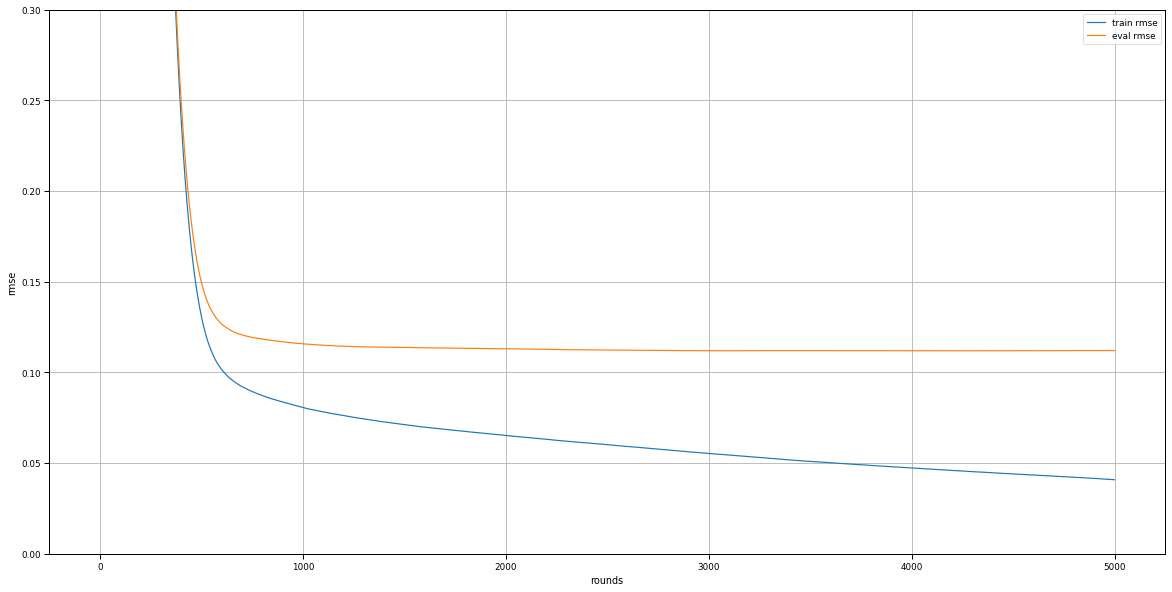

In [18]:
plt.figure(figsize=(20, 10))
train_metric = evals_result['train']['rmse']
plt.plot(train_metric, label='train rmse')
eval_metric = evals_result['eval']['rmse']
plt.plot(eval_metric, label='eval rmse')
plt.grid()
plt.legend()
plt.xlabel('rounds')
plt.ylabel('rmse')
plt.ylim(0, 0.3)
plt.show()

# 特徴量ごとの重要度を可視化する

ax = xgb.plot_importance(bst)
fig = ax.figure
fig.set_size_inches(10, 30)

# 提出

In [24]:
dtest = xgb.DMatrix(d_test_x)
my_submission = pd.DataFrame()
my_submission["Id"] = d_test_x['Id']
my_submission["SalePrice"] = np.exp(bst.predict(dtest))
# you could use any filename. We choose submission here
my_submission.to_csv('./dev_rsc/submission_first_201110.csv', index=False)